In [ ]:
#<start>only for colab users

In [22]:
pip install Keras-Applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.7 MB/s 


In [ ]:
# https://github.com/rcmalli/keras-vggface
!pip install git+https://github.com/rcmalli/keras-vggface.git

In [1]:
!mkdir images

In [ ]:
!wget https://github.com/sajjadranjbar73/deep-face-recognition/raw/master/images/1.jpg -P images
!wget https://github.com/sajjadranjbar73/deep-face-recognition/raw/master/images/2.jpg -P images
!wget https://github.com/sajjadranjbar73/deep-face-recognition/raw/master/images/3.jpg -P images
!wget https://github.com/sajjadranjbar73/deep-face-recognition/raw/master/images/ajb.jpg -P images

In [ ]:
#<end>only for colab users

In [8]:
import tensorflow as tf

In [16]:
filename = "/usr/local/lib/python3.7/dist-packages/keras_vggface/models.py"
text=open(filename).read()
open(filename,"w+").write(text.replace("keras.engine.topology","tensorflow.keras.utils"))
import tensorflow as tf

In [23]:
import numpy as np
from keras.preprocessing import image
from keras_vggface import utils

In [25]:
import numpy as np
from keras.preprocessing import image
from keras_vggface.vggface import VGGFace
from keras_vggface import utils

In [26]:
model = VGGFace() # default : VGG16 , you can use model='resnet50' or 'senet50'

580083712/580070376 [==============================] - 24s 0us/step


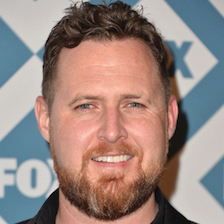

In [27]:
# Change the image path with yours.
img = image.load_img('./images/ajb.jpg', target_size=(224, 224))
img

In [28]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=1) # or version=2
preds = model.predict(x)
print('Predicted:', utils.decode_predictions(preds))

360448/346184 [===============================] - 0s 0us/step
Predicted: [[["b'A.J._Buckley'", 0.97900933], ["b'David_Denman'", 0.0014457281], ["b'Carmine_Giovinazzo'", 0.00086765195], ["b'Robert_Buckley'", 0.0007245664], ["b'Eddie_Cahill'", 0.0004183299]]]


In [29]:
# Convolution Features
vgg_features = VGGFace(include_top=False, input_shape=(224, 224, 3), pooling='avg') # pooling: None, avg or max

58925056/58909280 [==============================] - 4s 0us/step


In [30]:
emb = vgg_features.predict(x)
emb.shape

(1, 512)

لود تصاویر از دیسک

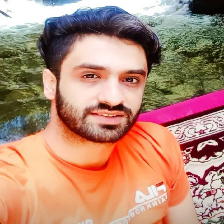

In [31]:
#read images
img1 = image.load_img('./images/1.jpg', target_size=(224, 224))
img1

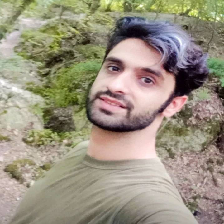

In [32]:
img2 = image.load_img('./images/2.jpg', target_size=(224, 224))
img2

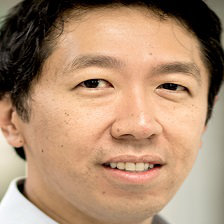

In [33]:
img3 = image.load_img('./images/3.jpg', target_size=(224, 224))
img3

In [34]:
def get_embedding(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = utils.preprocess_input(x, version=1) # or version=2
    emb = vgg_features.predict(x)
    return emb

In [35]:
emb1 = get_embedding(img1)
emb2 = get_embedding(img2)
emb3 = get_embedding(img3)

In [36]:
def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [37]:
verification_threshhold = 100

In [38]:
dist = findEuclideanDistance(emb1, emb2)
is_same = dist < verification_threshhold
print ("distance img1 and img2 =", dist, " issame =", is_same)

dist = findEuclideanDistance(emb1, emb3)
is_same = dist < verification_threshhold
print ("distance img1 and img2 =", dist, " issame =", is_same)

distance img1 and img2 = 74.35682  issame = True
distance img1 and img2 = 131.11427  issame = False


In [39]:
def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

In [40]:
verification_threshhold = 0.4

In [41]:
dist = findCosineDistance(emb1[0], emb2[0])
is_same = dist < verification_threshhold
print ("distance img1 and img2 =", dist, " issame =", is_same)

dist = findCosineDistance(emb1[0], emb3[0])
is_same = dist < verification_threshhold
print ("distance img1 and img2 =", dist, " issame =", is_same)

distance img1 and img2 = 0.2687504291534424  issame = True
distance img1 and img2 = 0.5660584568977356  issame = False
